3. Simple Spreadsheet Analysis
The marketing ops team sent over this spreadsheet containing four years of data from a CRM system: https://docs.google.com/spreadsheets/d/16hLtx8bBDe2GS1MOa3v9hY6Yhm4C30koLoCpiIJ5WDg/edit?usp=sharing.

Account managers would like to get in touch with as many of their clients as possible each month. In which month of the year does the team contact the greatest percentage of its clients?

(In addition to providing an answer, please either include a public link to a spreadsheet showing your work, or describe your process for answering the question.)

In [1]:
## LOAD LIBRARIES

# Data wrangling & processing: 
import numpy as np
import pandas as pd

# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warning messages:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
## ESTABLISH PLOT FORMATTING

#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

In [3]:
## LOAD DATA:

# Read in the CSV file, parsing the date column:
df = pd.read_csv('./CRM.csv', parse_dates=['Date of Contact'])

# Print dimensions:
print('Number of Loaded Rows: ', df.shape[0])
print('Number of Loaded Columns: ', df.shape[1], '\n')

# Specifics of loaded data, including types & memory usage:
df.info(memory_usage='deep')
print('\nNo missing values!')

# Print the first 3 rows of the dataframe:
df.head(3)

Number of Loaded Rows:  1000
Number of Loaded Columns:  3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Account manager    1000 non-null object
Client Name        1000 non-null object
Date of Contact    1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 150.2 KB

No missing values!


,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
2,Milan Crona,Armstrong Group,2013-11-02


In [8]:
number_of_clients = len(df['Client Name'].unique())

In [9]:

monthly_data = pd.groupby(df['Client Name'], 
                          by=[df['Date of Contact'].dt.year, df['Date of Contact'].dt.month]
                         ).agg({'Client Name': pd.Series.nunique})
monthly_data.index.set_names(['Year', 'Month'], inplace=True)
monthly_data.columns = ['UniqueClientsContacted']
monthly_data['PercentageOfClientele'] = (monthly_data.UniqueClientsContacted / number_of_clients) * 100
pd.options.display.float_format = '{:,.2f}%'.format
monthly_data.head(3)

UniqueClientsContacted  PercentageOfClientele
Year Month                                               
2013 10                         31                 88.57%
     11                         12                 34.29%
     12                         15                 42.86%

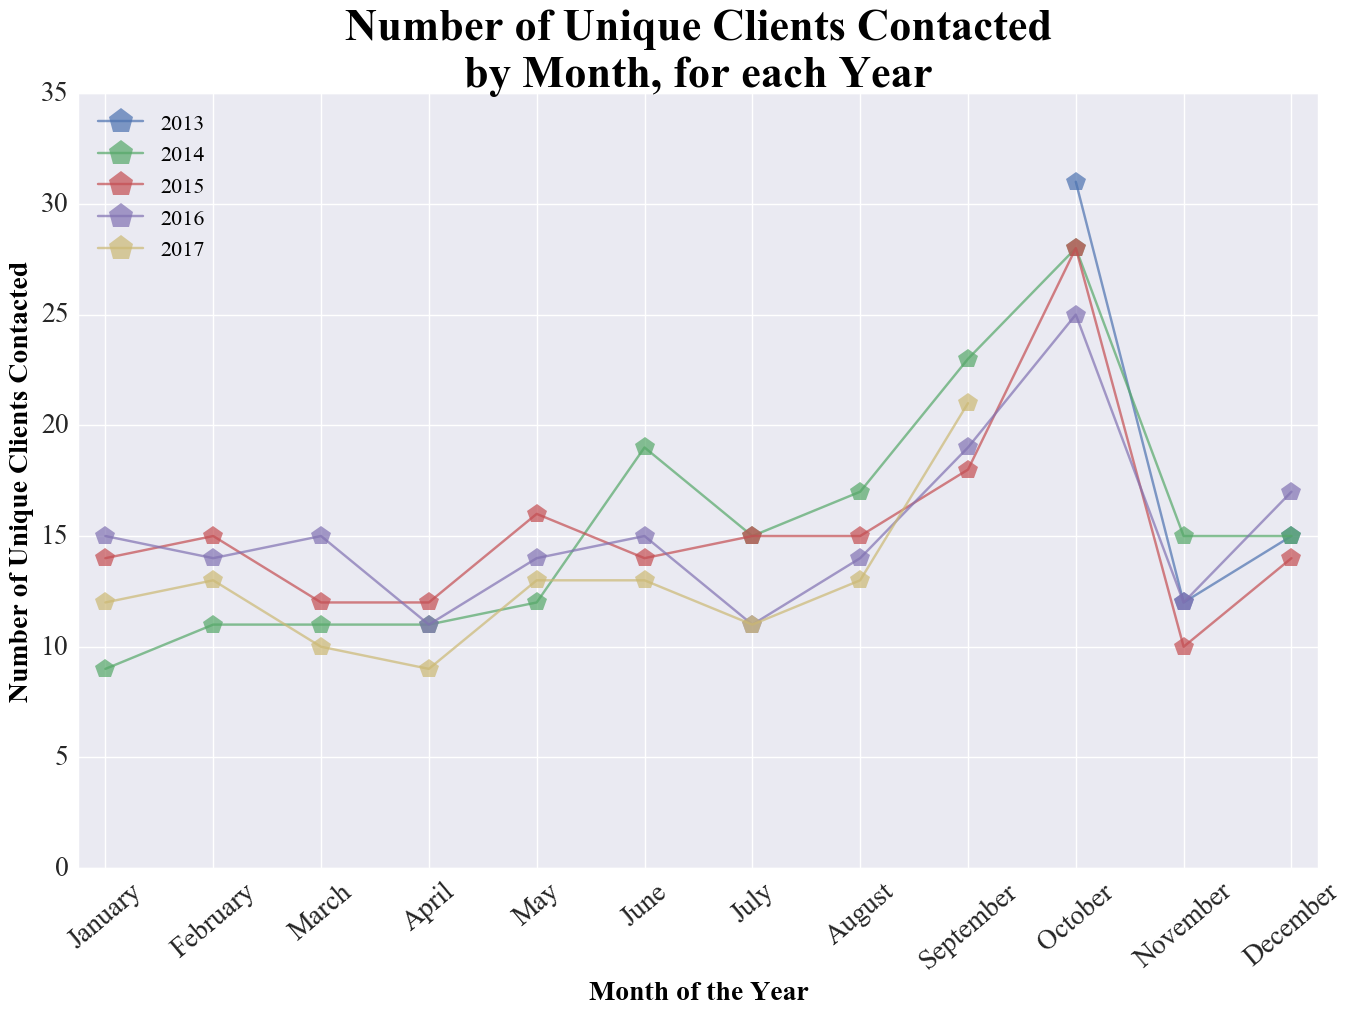

In [10]:
plt_format()

monthly_data.reset_index(inplace=True)

for year in monthly_data.Year.unique():
    data = monthly_data[monthly_data.Year == year]
    plt.plot(data.Month, data.UniqueClientsContacted, '-p', label=str(year), 
             markersize=15, alpha=0.7)

plt.title('Number of Unique Clients Contacted\nby Month, for each Year')

plt.xlabel('Month of the Year')
plt.xticks(np.arange(min(monthly_data.Month), max(monthly_data.Month)+1, 1.0), 
          ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December'], 
          rotation=40)
plt.xlim(0.75, 12.25)

plt.ylabel('Number of Unique Clients Contacted')
plt.ylim(0, 35)
plt.legend(loc=2, markerscale=1.25);

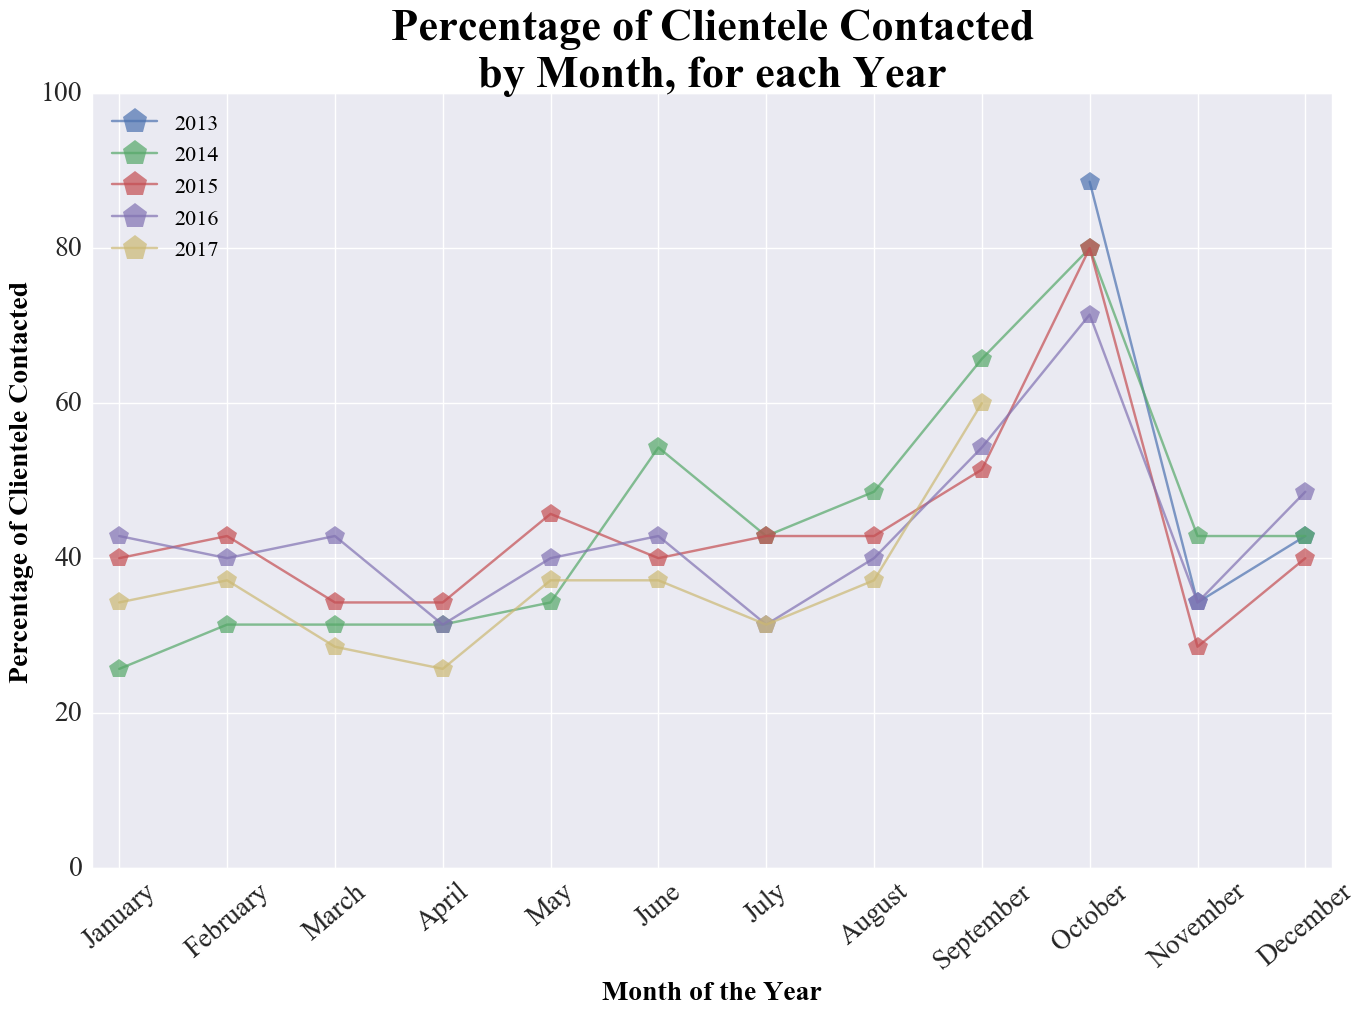

In [11]:
plt_format()

for year in monthly_data.Year.unique():
    data = monthly_data[monthly_data.Year == year]
    plt.plot(data.Month, data.PercentageOfClientele, '-p', label=str(year), 
             markersize=15, alpha=0.7)

plt.title('Percentage of Clientele Contacted\nby Month, for each Year')

plt.xlabel('Month of the Year')
plt.xticks(np.arange(min(monthly_data.Month), max(monthly_data.Month)+1, 1.0), 
          ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December'], 
          rotation=40)
plt.xlim(0.75, 12.25)

plt.ylabel('Percentage of Clientele Contacted')
plt.ylim(0, 100)
plt.legend(loc=2, markerscale=1.25);

In [12]:
monthly_data[monthly_data.Month == 10].loc[:, 'PercentageOfClientele'].mean()

80.0